# Sales Analysis and Visualization

**Project:** Global Electronics Retailer Dataset Analysis  
**Author:** Ammar Siregar  
**Purpose:** Comprehensive sales analysis with visualizations  

This notebook performs detailed analysis and creates visualizations to uncover business insights.

## Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Import custom visualization functions
import sys
sys.path.append('../scripts')
from visualization import *

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Cleaned Data

In [51]:
print("Loading cleaned data...")
print("=" * 30)

# Load the complete analysis dataset
sales_analysis = pd.read_csv('../data/processed/sales_analysis_complete.csv')

# Convert date columns back to datetime
date_columns = ['Order Date', 'Delivery Date', 'Birthday', 'Open Date']
for col in date_columns:
    if col in sales_analysis.columns:
        sales_analysis[col] = pd.to_datetime(sales_analysis[col])

print(f"✓ Loaded dataset with {sales_analysis.shape[0]:,} records and {sales_analysis.shape[1]} features")
print(f"Date range: {sales_analysis['Order Date'].min()} to {sales_analysis['Order Date'].max()}")

Loading cleaned data...
✓ Loaded dataset with 62,884 records and 44 features
Date range: 2016-01-01 00:00:00 to 2021-02-20 00:00:00
✓ Loaded dataset with 62,884 records and 44 features
Date range: 2016-01-01 00:00:00 to 2021-02-20 00:00:00


## Executive Summary - Key Metrics

In [52]:
# Calculate key business metrics
total_revenue = sales_analysis['Revenue'].sum()
total_profit = sales_analysis['Profit'].sum()
total_orders = sales_analysis['Order Number'].nunique()
total_customers = sales_analysis['CustomerKey'].nunique()
avg_order_value = total_revenue / total_orders
profit_margin = (total_profit / total_revenue) * 100

# Display key metrics
print("EXECUTIVE SUMMARY - KEY METRICS")
print("=" * 50)
print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"📈 Total Profit: ${total_profit:,.2f}")
print(f"📊 Profit Margin: {profit_margin:.2f}%")
print(f"🛒 Total Orders: {total_orders:,}")
print(f"👥 Total Customers: {total_customers:,}")
print(f"💵 Average Order Value: ${avg_order_value:.2f}")
print(f"📦 Total Items Sold: {sales_analysis['Quantity'].sum():,}")
print(f"🏪 Active Stores: {sales_analysis['StoreKey'].nunique()}")
print(f"🌍 Countries Served: {sales_analysis['Country_y'].nunique()}")

EXECUTIVE SUMMARY - KEY METRICS
💰 Total Revenue: $55,755,479.59
📈 Total Profit: $32,662,688.38
📊 Profit Margin: 58.58%
🛒 Total Orders: 26,326
👥 Total Customers: 11,887
💵 Average Order Value: $2117.89
📦 Total Items Sold: 197,757
🏪 Active Stores: 58
🌍 Countries Served: 9


## 1. Revenue Analysis

### Revenue by Product Category

TOP PRODUCT CATEGORIES BY REVENUE:
1. Computers: $19,301,595.46 (Profit: $11,277,447.90, Margin: 58.4%)
2. Home Appliances: $10,795,478.59 (Profit: $6,296,338.85, Margin: 58.3%)
3. Cameras and camcorders: $6,520,168.02 (Profit: $3,919,800.99, Margin: 60.1%)
4. Cell phones: $6,183,791.22 (Profit: $3,498,626.54, Margin: 56.6%)
5. TV and Video: $5,928,982.69 (Profit: $3,536,694.39, Margin: 59.7%)
6. Audio: $3,169,627.74 (Profit: $1,827,851.77, Margin: 57.7%)
7. Music, Movies and Audio Books: $3,131,006.44 (Profit: $1,909,259.17, Margin: 61.0%)
8. Games and Toys: $724,829.43 (Profit: $396,668.77, Margin: 54.7%)
✓ Chart saved to ../visualizations/sales_by_category.png
✓ Chart saved to ../visualizations/sales_by_category.png


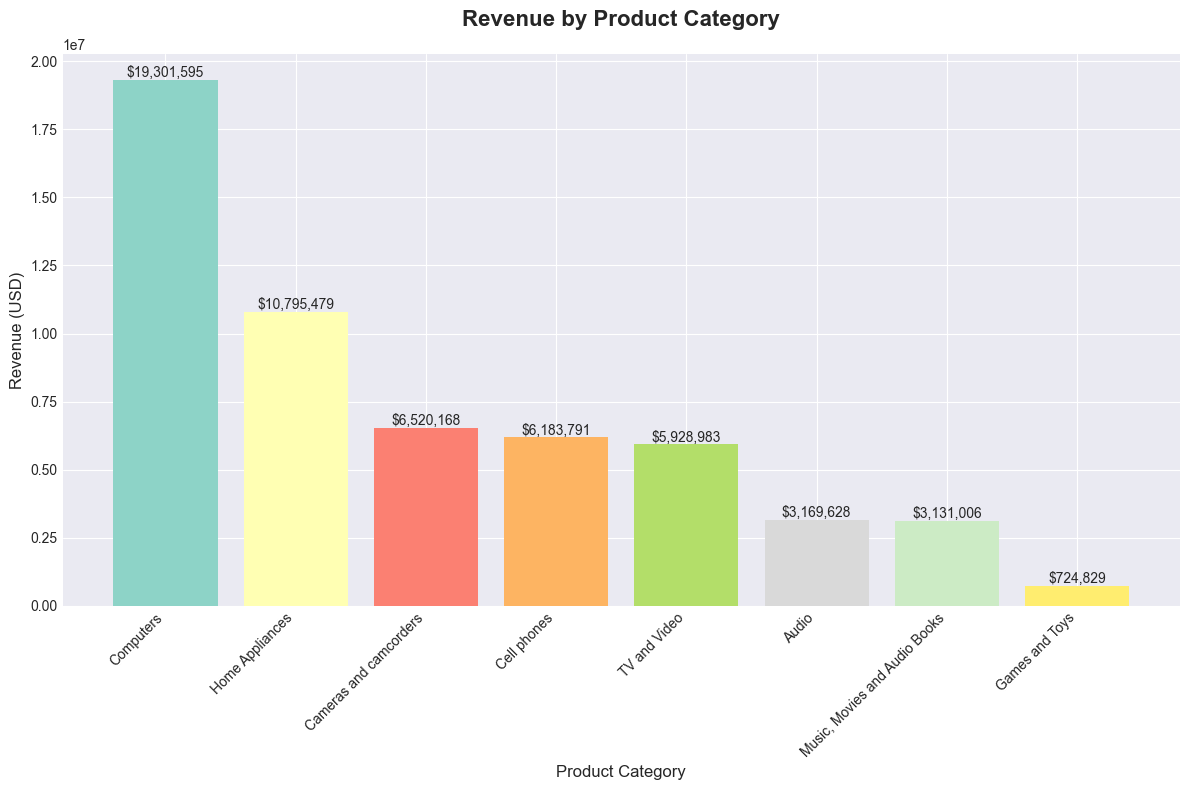

In [53]:
# Revenue by category analysis
category_revenue = sales_analysis.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
category_profit = sales_analysis.groupby('Category')['Profit'].sum().sort_values(ascending=False)

print("TOP PRODUCT CATEGORIES BY REVENUE:")
print("=" * 40)
for i, (category, revenue) in enumerate(category_revenue.items(), 1):
    profit = category_profit[category]
    margin = (profit / revenue) * 100
    print(f"{i}. {category}: ${revenue:,.2f} (Profit: ${profit:,.2f}, Margin: {margin:.1f}%)")

# Create and save category revenue visualization
create_category_revenue_chart(sales_analysis, save_path='../visualizations/sales_by_category.png')
plt.show()

### Top Products Analysis

TOP 15 PRODUCTS BY REVENUE:
 1. WWI Desktop PC2.33 X2330 Black                     $505,450.00
 2. Adventure Works Desktop PC2.33 XD233 Silver        $466,089.00
 3. Adventure Works Desktop PC2.33 XD233 Brown         $464,151.00
 4. Adventure Works Desktop PC2.33 XD233 Black         $447,678.00
 5. Adventure Works Desktop PC2.33 XD233 White         $437,019.00
 6. WWI Desktop PC2.33 X2330 White                     $424,578.00
 7. WWI Desktop PC2.33 X2330 Brown                     $422,740.00
 8. Adventure Works 52" LCD HDTV X590 White            $394,398.64
 9. Adventure Works 52" LCD HDTV X590 Black            $374,098.71
10. WWI Desktop PC2.33 X2330 Silver                    $360,248.00
11. Adventure Works 52" LCD HDTV X590 Silver           $353,798.78
12. Adventure Works Desktop PC2.30 MD230 White         $312,079.00
13. Adventure Works 52" LCD HDTV X590 Brown            $310,298.93
14. Adventure Works Desktop PC2.30 MD230 Black         $307,886.00
15. Adventure Works Desktop PC2.30

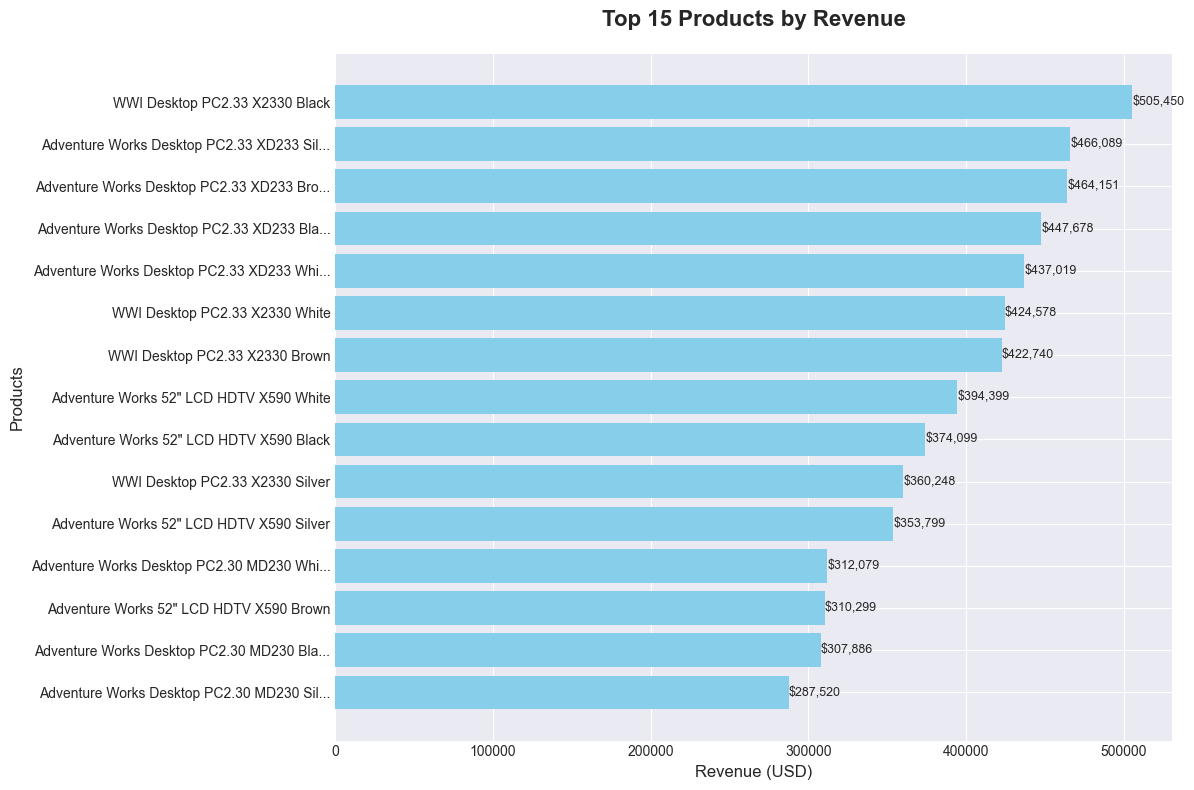

In [54]:
# Top products by revenue
top_products = sales_analysis.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(15)

print("TOP 15 PRODUCTS BY REVENUE:")
print("=" * 35)
for i, (product, revenue) in enumerate(top_products.items(), 1):
    print(f"{i:2}. {product[:50]:<50} ${revenue:>10,.2f}")

# Create top products visualization
create_top_products_chart(sales_analysis, save_path='../visualizations/top_products.png')
plt.show()

## 2. Time Series Analysis

### Monthly Sales Trends

MONTHLY SALES PERFORMANCE:
   Order Date    Revenue     Profit  Order Number  Profit Margin
56 2020-09-01  380431.52  222284.38           180      58.429538
57 2020-10-01  245647.59  141098.51           159      57.439403
58 2020-11-01  256701.02  149679.25           149      58.308787
59 2020-12-01  651526.44  384657.66           318      59.039455
60 2021-01-01  513021.58  300479.71           256      58.570579
61 2021-02-01  526266.90  307983.98           242      58.522392
✓ Chart saved to ../visualizations/monthly_trends.png
✓ Chart saved to ../visualizations/monthly_trends.png


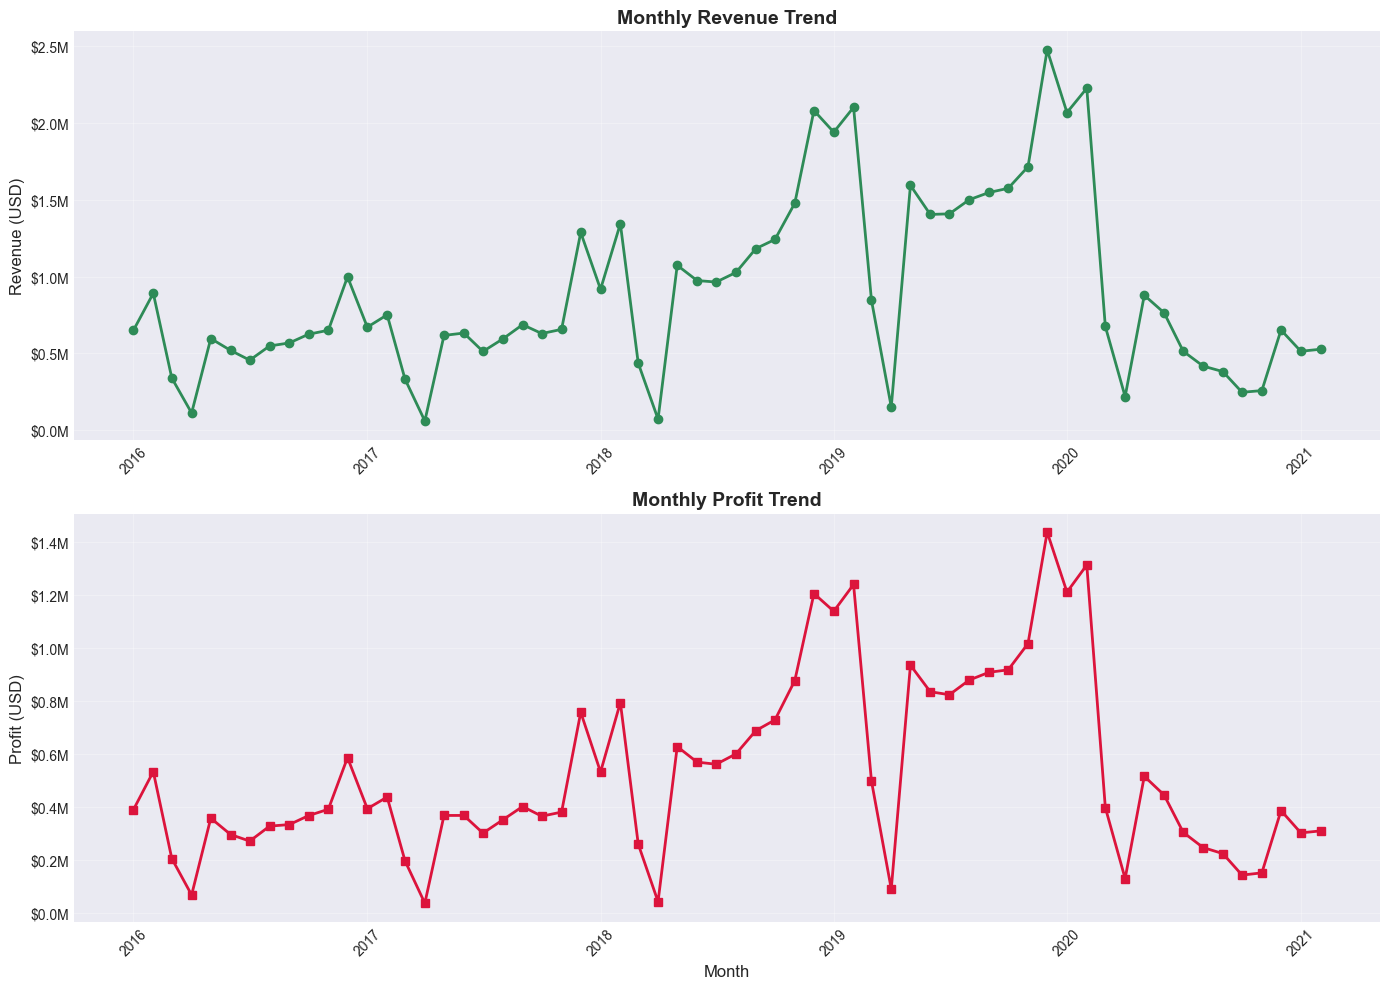

In [55]:
# Monthly sales trend
monthly_sales = sales_analysis.groupby(sales_analysis['Order Date'].dt.to_period('M')).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order Number': 'nunique'
}).reset_index()

monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()
monthly_sales['Profit Margin'] = (monthly_sales['Profit'] / monthly_sales['Revenue']) * 100

print("MONTHLY SALES PERFORMANCE:")
print("=" * 30)
print(monthly_sales.tail(6))

# Create monthly trends visualization
create_monthly_trends_chart(sales_analysis, save_path='../visualizations/monthly_trends.png')
plt.show()

### Seasonal Analysis

QUARTERLY PERFORMANCE:


,Year,Quarter,Revenue,Profit,Order Number
0,2016,1,1879424.44,1123498.70,735
1,2016,2,1225163.09,716551.00,504
2,2016,3,1569893.64,927138.89,692
3,2016,4,2272312.39,1339811.88,934
4,2017,1,1751889.58,1022212.20,778
5,2017,2,1306570.33,767634.52,553
6,2017,3,1791540.87,1049182.57,789
7,2017,4,2571421.49,1498034.77,1160
8,2018,1,2696369.20,1580406.55,1145
9,2018,2,2117868.43,1234528.50,981



SALES BY DAY OF WEEK:
Monday: $5,730,951.16
Tuesday: $7,711,428.45
Wednesday: $9,908,085.14
Thursday: $10,646,488.92
Friday: $7,648,958.98
Saturday: $13,203,179.09
Sunday: $906,387.85


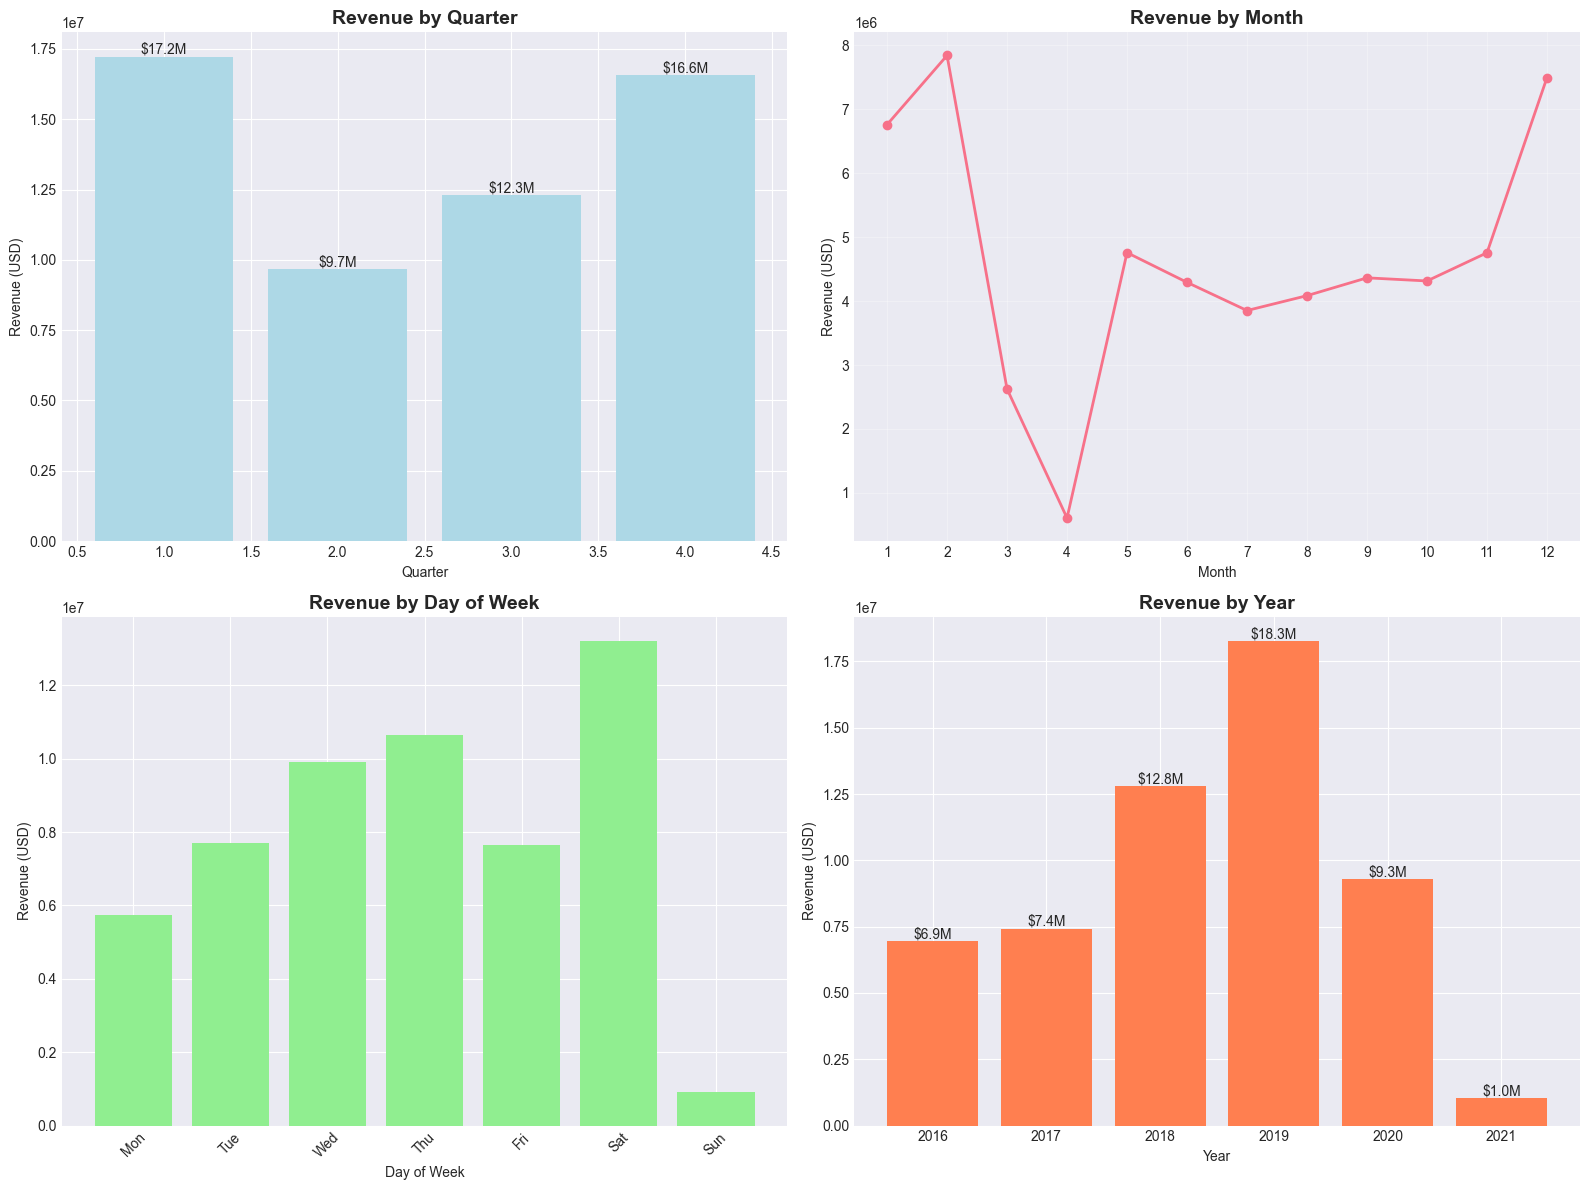

In [56]:
# Quarterly and seasonal analysis
quarterly_performance = sales_analysis.groupby(['Year', 'Quarter']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order Number': 'nunique'
}).reset_index()

print("QUARTERLY PERFORMANCE:")
print("=" * 25)
display(quarterly_performance)

# Day of week analysis
daily_performance = sales_analysis.groupby('Day of Week')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

print("\nSALES BY DAY OF WEEK:")
print("=" * 25)
for day, revenue in daily_performance.items():
    print(f"{day}: ${revenue:,.2f}")

# Create seasonal analysis visualization
create_seasonal_analysis_chart(sales_analysis)
plt.show()

## 3. Customer Analysis

### Customer Demographics

CUSTOMER DEMOGRAPHICS - GENDER:


,Gender,Revenue,CustomerKey,Order Number,Avg Revenue per Customer
0,Female,27420624.99,5858,12970,4680.885113
1,Male,28334854.60,6029,13356,4699.760259



CUSTOMER DEMOGRAPHICS - AGE GROUPS:


,Age Group,Revenue,CustomerKey,Avg Revenue per Customer
0,18-25,7058100.70,1574,4484.180877
1,26-35,8491372.81,2006,4232.987443
2,36-45,8424127.55,1972,4271.869954
3,46-55,8147490.87,1994,4086.003445
4,56-65,8202723.37,1981,4140.698319
5,65+,15431664.29,3376,4570.990607


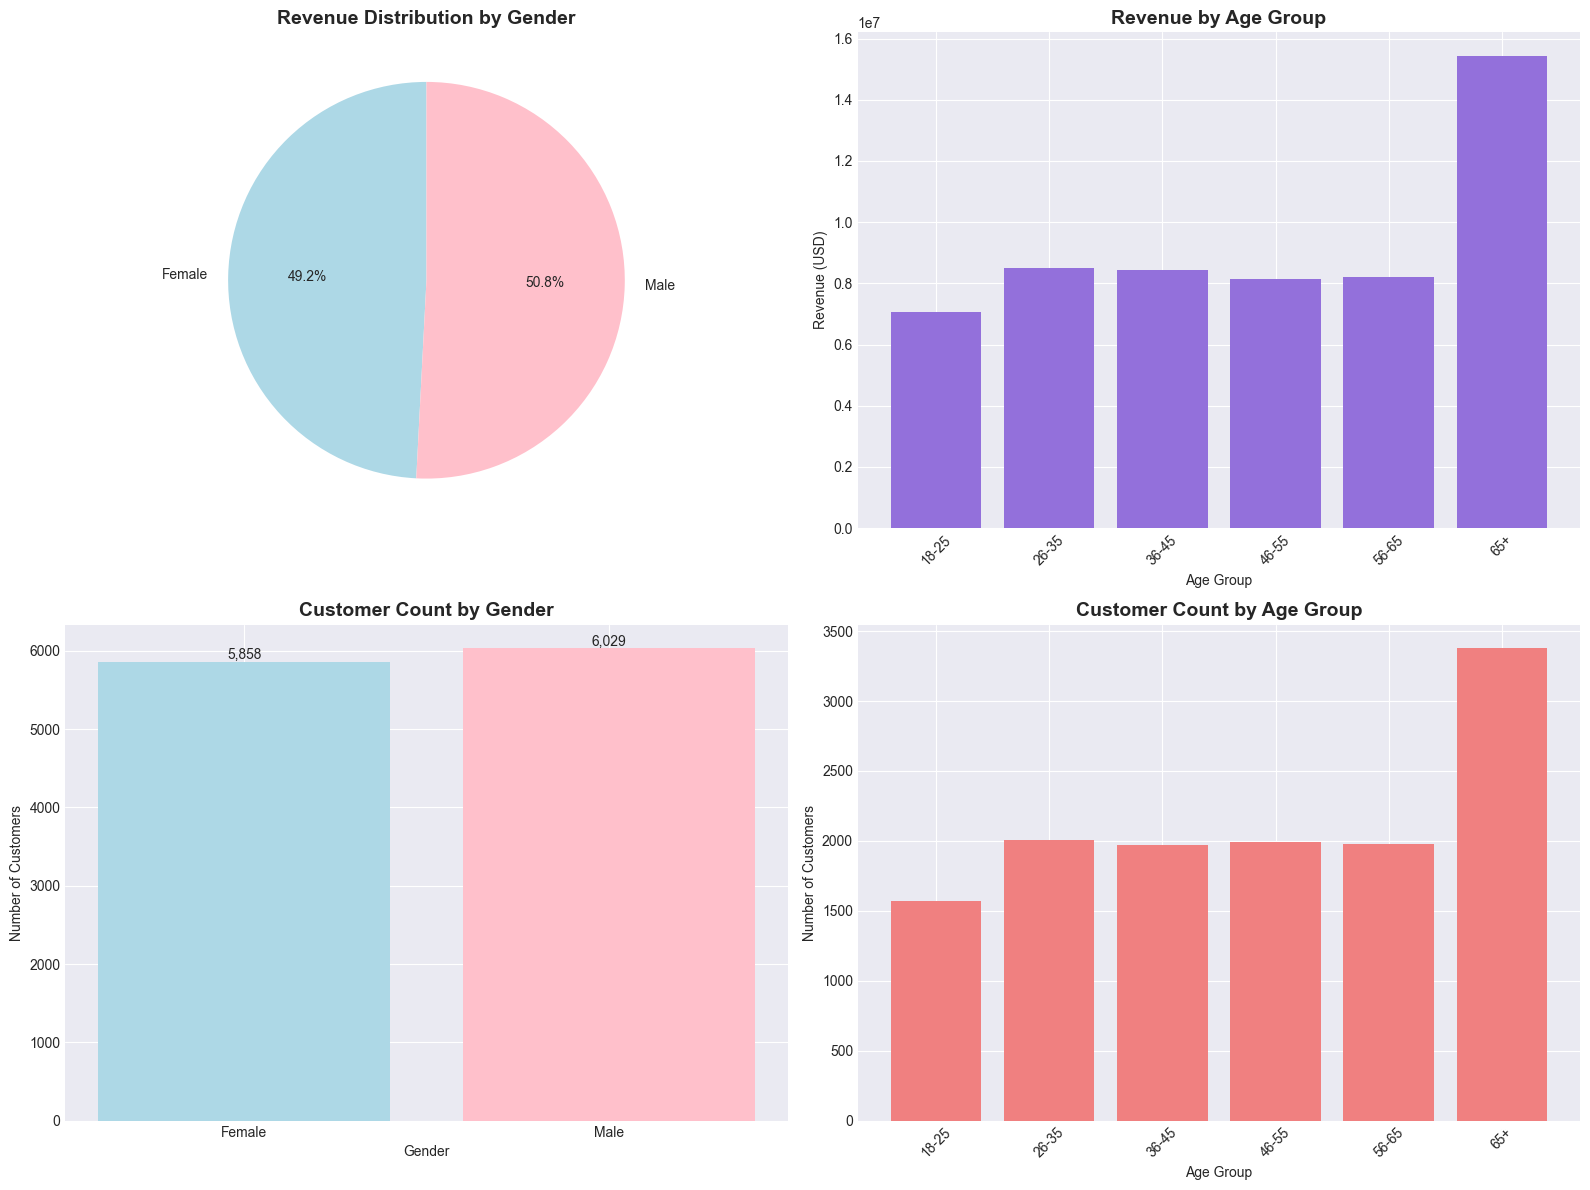

In [57]:
# Customer demographics analysis
gender_analysis = sales_analysis.groupby('Gender').agg({
    'Revenue': 'sum',
    'CustomerKey': 'nunique',
    'Order Number': 'nunique'
}).reset_index()

gender_analysis['Avg Revenue per Customer'] = gender_analysis['Revenue'] / gender_analysis['CustomerKey']

print("CUSTOMER DEMOGRAPHICS - GENDER:")
print("=" * 40)
display(gender_analysis)

# Age group analysis
age_analysis = sales_analysis.groupby('Age Group').agg({
    'Revenue': 'sum',
    'CustomerKey': 'nunique'
}).reset_index()

age_analysis['Avg Revenue per Customer'] = age_analysis['Revenue'] / age_analysis['CustomerKey']

print("\nCUSTOMER DEMOGRAPHICS - AGE GROUPS:")
print("=" * 40)
display(age_analysis)

# Create customer demographics visualization
create_customer_demographics_chart(sales_analysis)
plt.show()

### Top Customers

In [58]:
# Top customers analysis - Fixed with debugging
# First, let's check what country column is available for customers
customer_country_cols = [col for col in sales_analysis.columns if 'country' in col.lower()]
print(f"Available country columns: {customer_country_cols}")

# Check for missing values in key columns
print(f"\nMissing values check:")
key_columns = ['CustomerKey', 'Name', 'Gender', 'Country_x']
for col in key_columns:
    if col in sales_analysis.columns:
        missing_count = sales_analysis[col].isnull().sum()
        print(f"{col}: {missing_count} missing values")
    else:
        print(f"{col}: Column not found!")

# Check sample data
print(f"\nSample customer data:")
sample_cols = ['CustomerKey', 'Name', 'Gender', 'Country_x', 'Revenue']
available_cols = [col for col in sample_cols if col in sales_analysis.columns]
print(sales_analysis[available_cols].head(10))

# Create top customers analysis with fallback options
print(f"\nAnalyzing top customers...")

try:
    # Try with all columns including Country_x
    top_customers = sales_analysis.groupby(['CustomerKey', 'Name', 'Gender', 'Country_x']).agg({
        'Revenue': 'sum',
        'Order Number': 'nunique',
        'Profit': 'sum'
    }).reset_index().sort_values('Revenue', ascending=False).head(20)
    
    print(f"Found {len(top_customers)} customers with full details")
    
except Exception as e:
    print(f"Error with Country_x: {e}")
    # Fallback: Try without Country_x
    try:
        top_customers = sales_analysis.groupby(['CustomerKey', 'Name', 'Gender']).agg({
            'Revenue': 'sum',
            'Order Number': 'nunique', 
            'Profit': 'sum'
        }).reset_index().sort_values('Revenue', ascending=False).head(20)
        
        print(f"Found {len(top_customers)} customers without country info")
        
    except Exception as e2:
        print(f"Error without Country_x: {e2}")
        # Final fallback: Just CustomerKey and Name
        top_customers = sales_analysis.groupby(['CustomerKey', 'Name']).agg({
            'Revenue': 'sum',
            'Order Number': 'nunique',
            'Profit': 'sum'
        }).reset_index().sort_values('Revenue', ascending=False).head(20)
        
        print(f"Found {len(top_customers)} customers with basic info only")

print(f"\nTOP 20 CUSTOMERS BY REVENUE:")
print("=" * 50)

if len(top_customers) > 0:
    for i, row in top_customers.iterrows():
        customer_info = f"{i+1:2}. {row['Name'][:30]:<30} ${row['Revenue']:>10,.2f} ({row['Order Number']} orders)"
        
        # Add country if available
        if 'Country_x' in row.index:
            customer_info += f" - {row['Country_x']}"
        
        # Add gender if available
        if 'Gender' in row.index:
            customer_info += f" ({row['Gender']})"
            
        print(customer_info)
else:
    print("No customer data found - please check data integrity")

Available country columns: ['Country_x', 'Country_y']

Missing values check:
CustomerKey: 0 missing values
Name: 0 missing values
Gender: 0 missing values
Country_x: 0 missing values

Sample customer data:
   CustomerKey            Name  Gender       Country_x  Revenue
0       265598    Tyler Vaught    Male          Canada    68.00
1      1269051  Frank Upchurch    Male   United States   854.00
2      1269051  Frank Upchurch    Male   United States   665.94
3       266019      Joan Roche  Female          Canada  2254.00
4       266019      Joan Roche  Female          Canada   326.00
5       266019      Joan Roche  Female          Canada  2584.00
6      1107461      Sam Nelson    Male  United Kingdom  9553.20
7      1107461      Sam Nelson    Male  United Kingdom   510.00
8       844003  Ouassim Heuver    Male     Netherlands  1876.00
9      2035771  Damiana Corona  Female   United States    57.99

Analyzing top customers...
Found 20 customers with full details

TOP 20 CUSTOMERS BY REVE

## 4. Geographic Analysis

### Revenue by Country and Store Performance

PERFORMANCE BY COUNTRY:


,Country_y,Revenue,Profit,StoreKey,CustomerKey,Profit Margin,Revenue per Store
8,United States,23764425.86,13922159.05,20,5179,58.584033,1.188221e+06
6,Online,11404324.63,6672692.64,1,4547,58.510196,1.140432e+07
7,United Kingdom,5749769.78,3351500.32,7,1424,58.289296,8.213957e+05
3,Germany,4246279.22,2496534.61,8,1008,58.793463,5.307849e+05
1,Canada,3611561.79,2104137.96,3,1042,58.261165,1.203854e+06
0,Australia,2099141.07,1243629.87,5,657,59.244702,4.198282e+05
4,Italy,2059086.81,1209093.91,3,475,58.719909,6.863623e+05
5,Netherlands,1591344.48,937765.36,4,483,58.929124,3.978361e+05
2,France,1229545.95,725174.66,7,389,58.979061,1.756494e+05



TOP 15 STORES BY REVENUE:
 1. Store 0 - Online, Online: $11,404,324.63
 8. Store 9 - Canada, Northwest Territories: $1,336,150.06
 7. Store 8 - Canada, Newfoundland and Labrador: $1,232,225.93


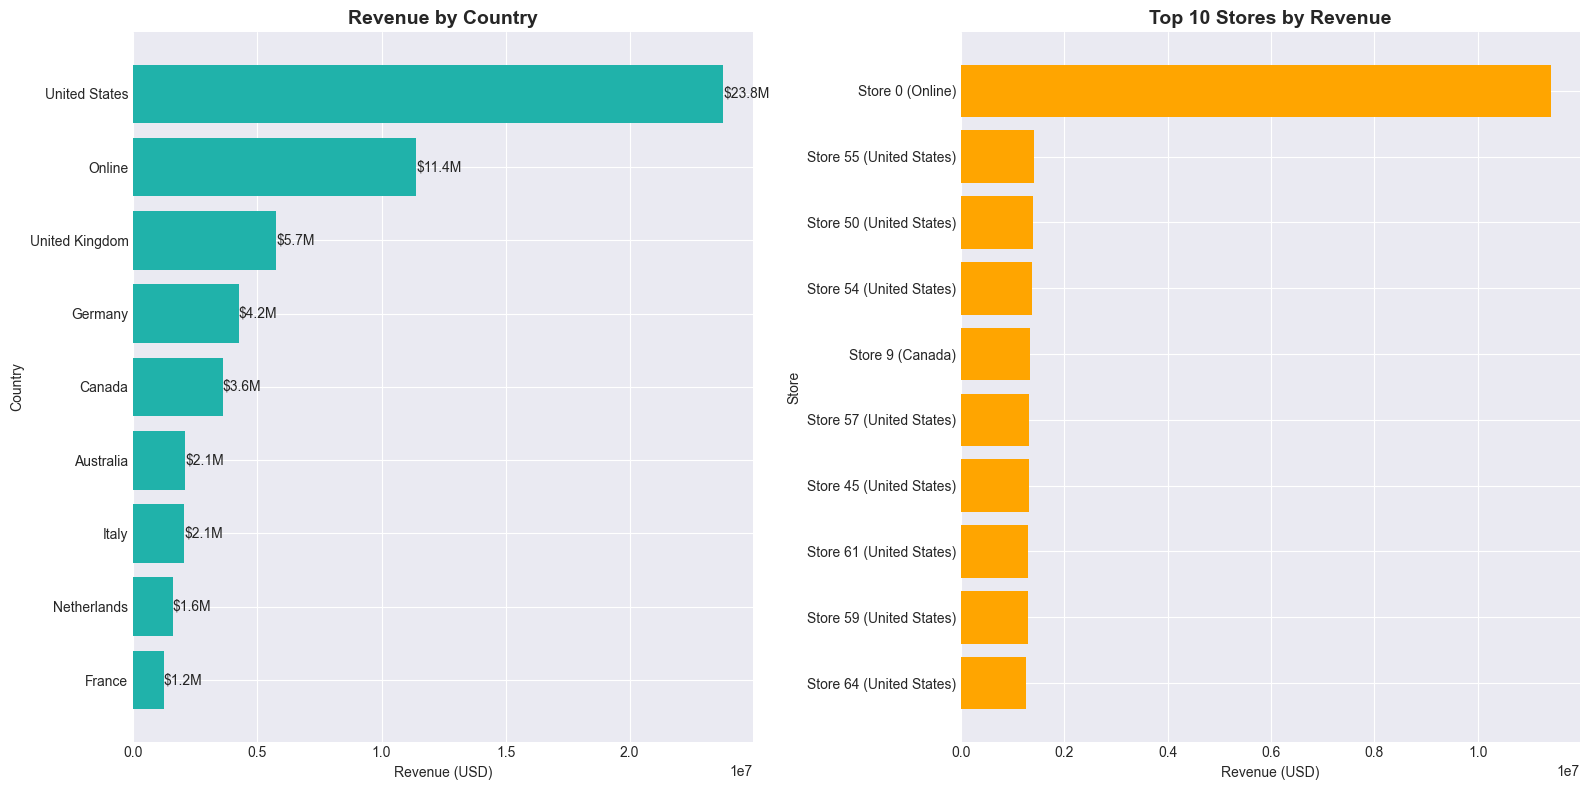

In [59]:
# Geographic analysis
country_performance = sales_analysis.groupby('Country_y').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'StoreKey': 'nunique',
    'CustomerKey': 'nunique'
}).reset_index().sort_values('Revenue', ascending=False)

country_performance['Profit Margin'] = (country_performance['Profit'] / country_performance['Revenue']) * 100
country_performance['Revenue per Store'] = country_performance['Revenue'] / country_performance['StoreKey']

print("PERFORMANCE BY COUNTRY:")
print("=" * 30)
display(country_performance)

# Top performing stores
store_performance = sales_analysis.groupby(['StoreKey', 'Country_y', 'State_y']).agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index().sort_values('Revenue', ascending=False).head(15)

print("\nTOP 15 STORES BY REVENUE:")
print("=" * 30)
for i, row in store_performance.iterrows():
    if i < 15:
        print(f"{i+1:2}. Store {row['StoreKey']} - {row['Country_y']}, {row['State_y']}: ${row['Revenue']:,.2f}")

# Create geographic analysis visualization
create_geographic_analysis_chart(sales_analysis)
plt.show()

## 5. Brand and Category Analysis

TOP 15 BRANDS BY REVENUE:


,Brand,Revenue,Profit,ProductKey,Quantity,Profit Margin,Revenue per Product
1,Adventure Works,11849909.32,6937318.88,183,20099,58.543223,64753.602842
2,Contoso,10792325.32,6321209.14,708,49827,58.571336,15243.397345
10,Wide World Importers,9172800.41,5367028.30,170,27413,58.510248,53957.649471
3,Fabrikam,6807893.52,4061475.11,267,11384,59.658323,25497.728539
9,The Phone Company,5386820.00,3057762.90,152,18764,56.763785,35439.605263
6,Proseware,3212628.02,1935287.10,239,9427,60.239999,13441.958243
4,Litware,2659498.78,1553765.19,258,5309,58.423234,10308.134806
7,Southridge Video,2578595.93,1522876.84,192,24814,59.058374,13430.187135
0,A. Datum,1486207.80,883502.31,132,5655,59.446755,11259.150000
5,Northwind Traders,1126069.54,649413.31,47,7610,57.670800,23958.926383


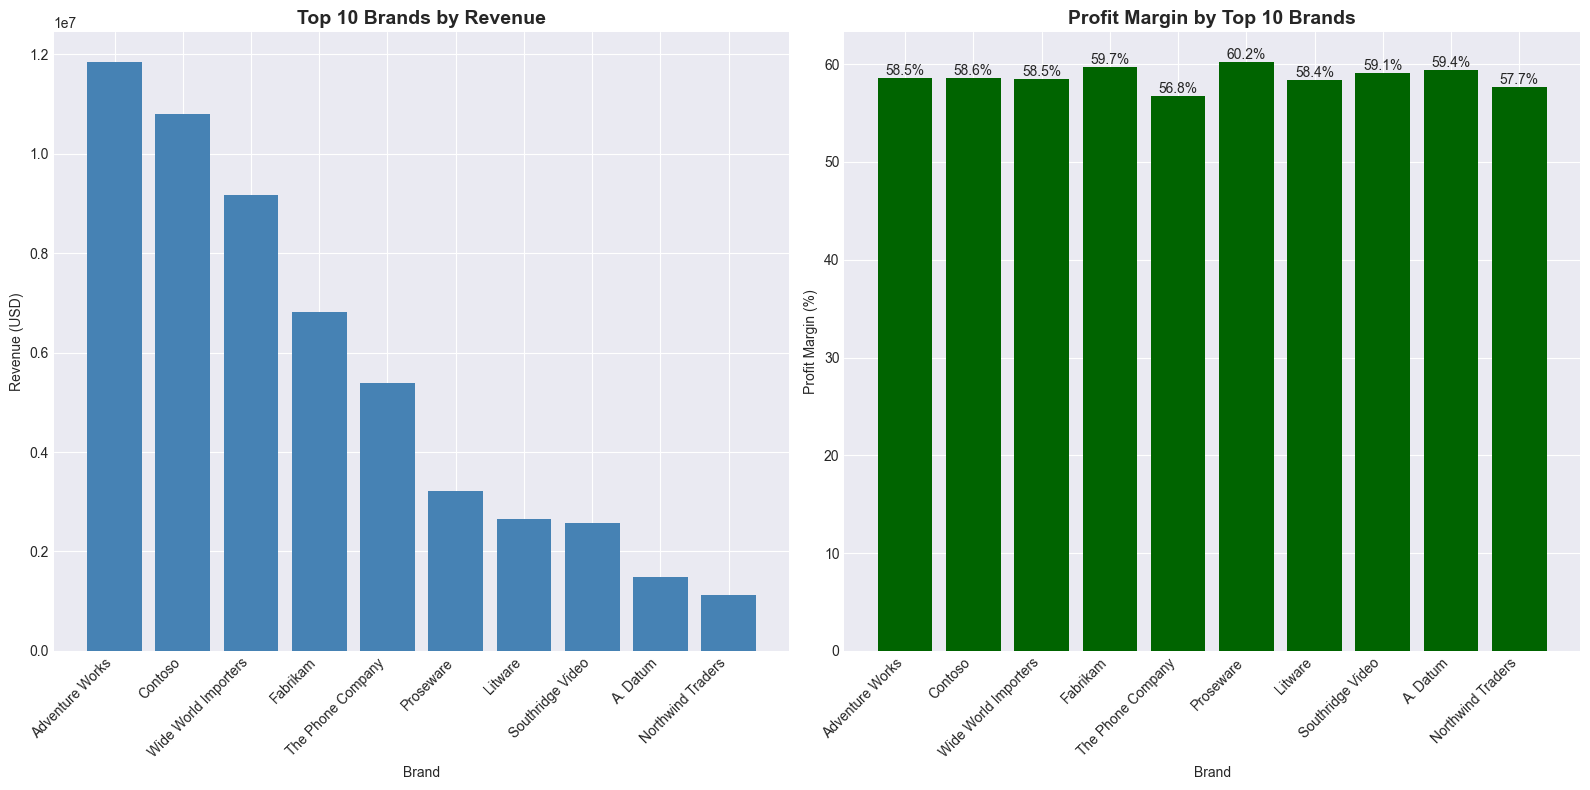

In [60]:
# Brand performance analysis
brand_performance = sales_analysis.groupby('Brand').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'ProductKey': 'nunique',
    'Quantity': 'sum'
}).reset_index().sort_values('Revenue', ascending=False).head(15)

brand_performance['Profit Margin'] = (brand_performance['Profit'] / brand_performance['Revenue']) * 100
brand_performance['Revenue per Product'] = brand_performance['Revenue'] / brand_performance['ProductKey']

print("TOP 15 BRANDS BY REVENUE:")
print("=" * 30)
display(brand_performance.head(10))

# Create brand performance visualization
create_brand_performance_chart(sales_analysis)
plt.show()

## 6. Profitability Analysis

PROFITABILITY ANALYSIS
PROFITABILITY BY CATEGORY:
Music, Movies and Audio Books: 61.0% margin ($1,909,259.17 profit)
Cameras and camcorders: 60.1% margin ($3,919,800.99 profit)
TV and Video: 59.7% margin ($3,536,694.39 profit)
Computers: 58.4% margin ($11,277,447.90 profit)
Home Appliances: 58.3% margin ($6,296,338.85 profit)
Audio: 57.7% margin ($1,827,851.77 profit)
Cell phones: 56.6% margin ($3,498,626.54 profit)
Games and Toys: 54.7% margin ($396,668.77 profit)


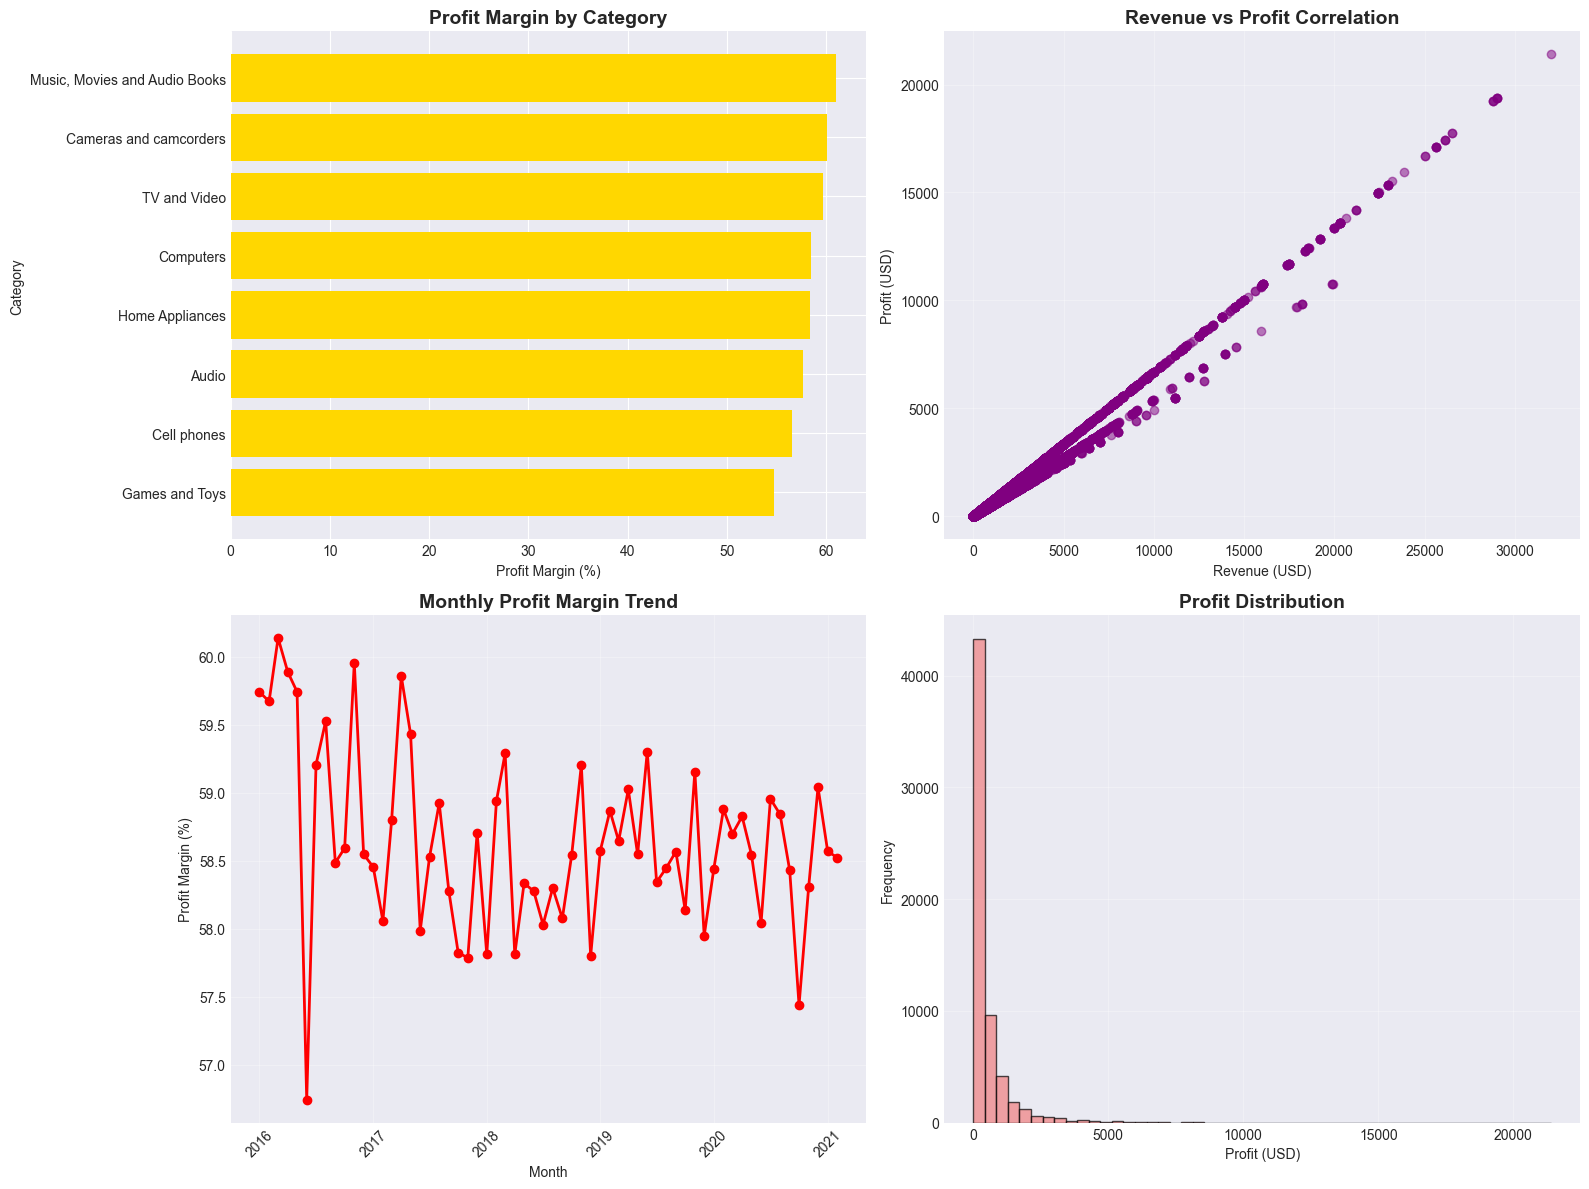

In [61]:
# Profitability analysis by different dimensions
print("PROFITABILITY ANALYSIS")
print("=" * 30)

# Most profitable categories
category_profitability = sales_analysis.groupby('Category').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()
category_profitability['Profit Margin'] = (category_profitability['Profit'] / category_profitability['Revenue']) * 100
category_profitability = category_profitability.sort_values('Profit Margin', ascending=False)

print("PROFITABILITY BY CATEGORY:")
for _, row in category_profitability.iterrows():
    print(f"{row['Category']}: {row['Profit Margin']:.1f}% margin (${row['Profit']:,.2f} profit)")

# Create profitability visualization
create_profitability_analysis_chart(sales_analysis)
plt.show()

## 7. Comprehensive Dashboard

Creating comprehensive dashboard...
✓ Dashboard saved to ../visualizations/sales_dashboard.png
✓ Dashboard saved to ../visualizations/sales_dashboard.png


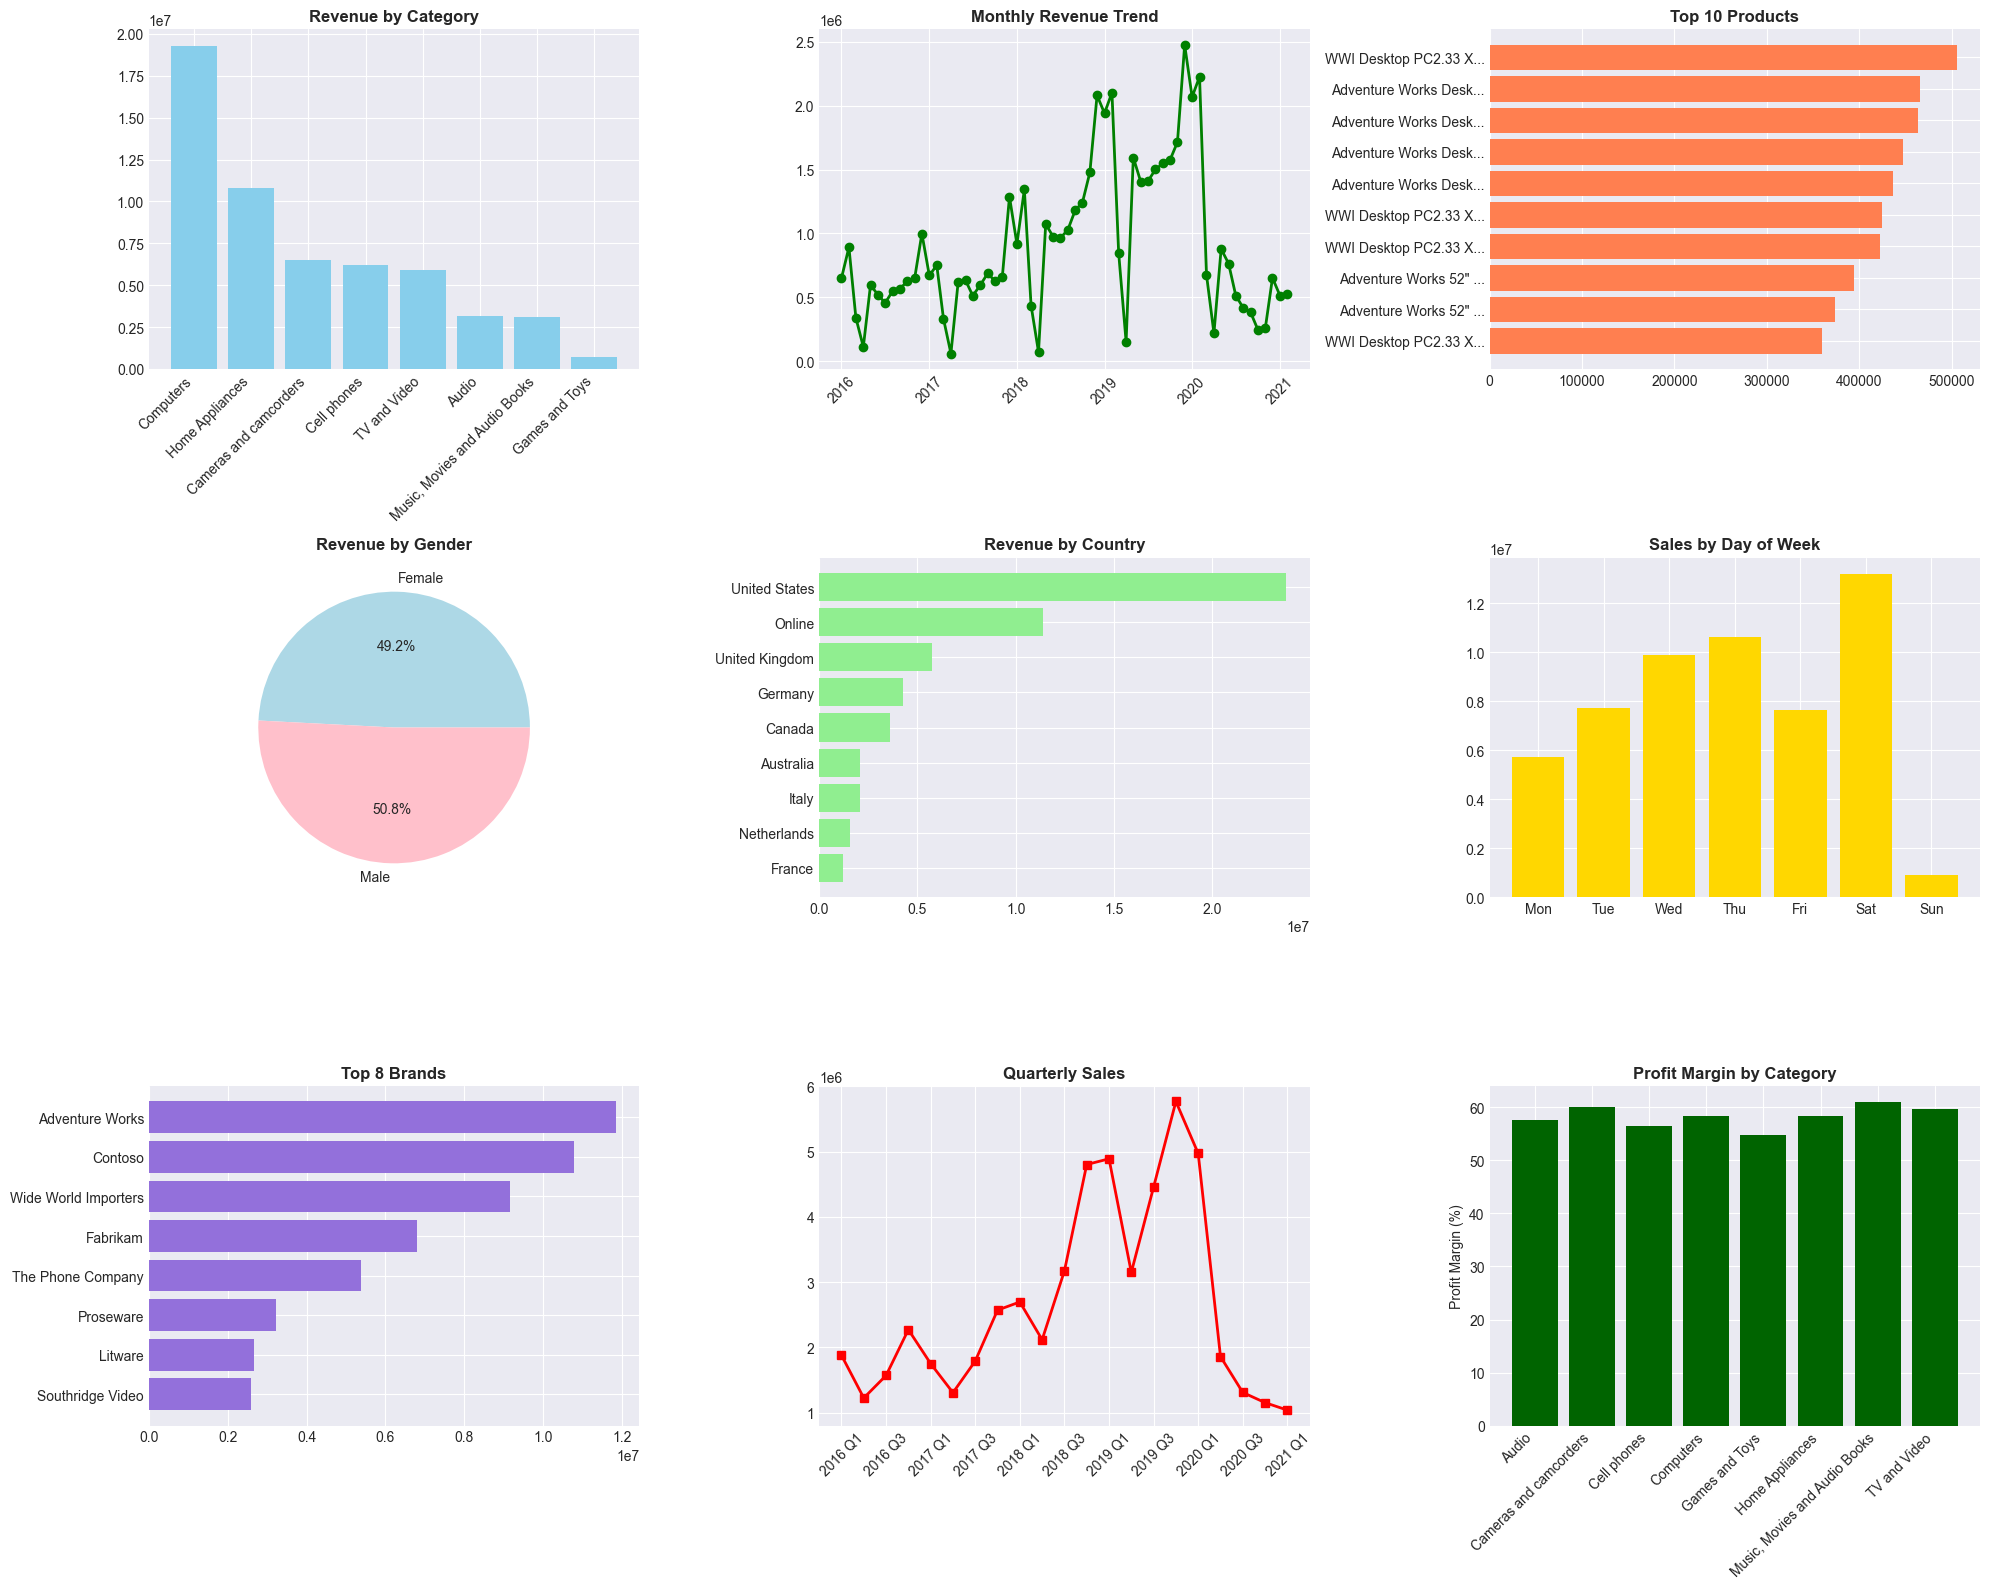

✓ Dashboard created and saved


In [62]:
# Create comprehensive dashboard
print("Creating comprehensive dashboard...")

# Create the main dashboard with multiple visualizations
create_sales_dashboard(sales_analysis, save_path='../visualizations/sales_dashboard.png')
plt.show()

print("✓ Dashboard created and saved")

## 8. Revenue Distribution Analysis

REVENUE DISTRIBUTION ANALYSIS
Order Value Statistics:
Mean: $2117.89
Median: $1146.00
Std Dev: $2870.88
Min: $0.95
Max: $43278.83
✓ Chart saved to ../visualizations/revenue_distribution.png
✓ Chart saved to ../visualizations/revenue_distribution.png


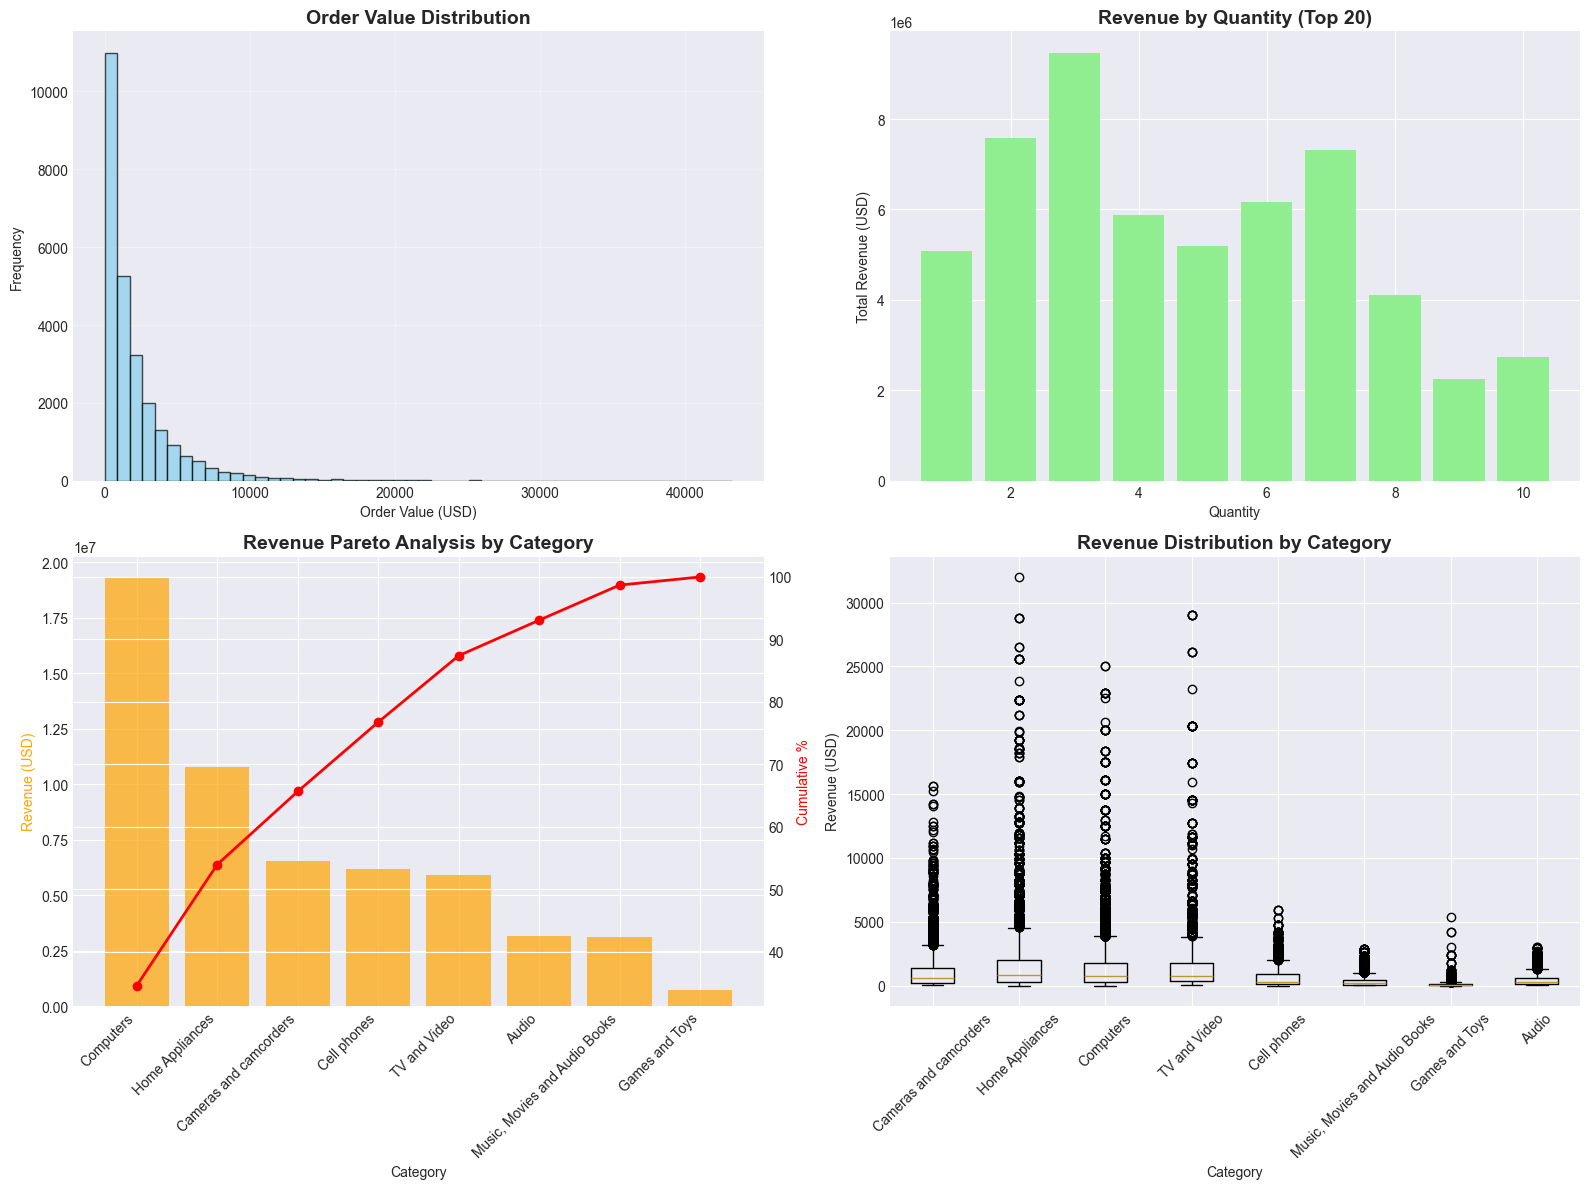

In [63]:
# Revenue distribution analysis
print("REVENUE DISTRIBUTION ANALYSIS")
print("=" * 35)

# Order value distribution
order_values = sales_analysis.groupby('Order Number')['Revenue'].sum()

print(f"Order Value Statistics:")
print(f"Mean: ${order_values.mean():.2f}")
print(f"Median: ${order_values.median():.2f}")
print(f"Std Dev: ${order_values.std():.2f}")
print(f"Min: ${order_values.min():.2f}")
print(f"Max: ${order_values.max():.2f}")

# Create revenue distribution visualization
create_revenue_distribution_chart(sales_analysis, save_path='../visualizations/revenue_distribution.png')
plt.show()

## 9. Export Analysis Results

In [64]:
print("Exporting analysis results...")
print("=" * 35)

# Create summary statistics
summary_stats = {
    'Metric': ['Total Revenue', 'Total Profit', 'Profit Margin (%)', 'Total Orders', 
               'Total Customers', 'Average Order Value', 'Total Items Sold'],
    'Value': [f"${total_revenue:,.2f}", f"${total_profit:,.2f}", f"{profit_margin:.2f}%", 
              f"{total_orders:,}", f"{total_customers:,}", f"${avg_order_value:.2f}", 
              f"{sales_analysis['Quantity'].sum():,}"]
}

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('../data/processed/analysis_summary.csv', index=False)
print("✓ Analysis summary exported")

# Export top performers
category_revenue.to_csv('../data/processed/category_performance.csv')
top_products.to_csv('../data/processed/top_products.csv')
top_customers.to_csv('../data/processed/top_customers.csv', index=False)
store_performance.to_csv('../data/processed/store_performance.csv', index=False)

print("✓ Performance data exported")
print("\nAll analysis results saved to data/processed/")

Exporting analysis results...
✓ Analysis summary exported
✓ Performance data exported

All analysis results saved to data/processed/


## 10. Key Insights and Recommendations

In [65]:
# Generate insights based on analysis
print("KEY BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

# Top category insights
top_category = category_revenue.index[0]
top_category_revenue = category_revenue.iloc[0]
top_category_share = (top_category_revenue / total_revenue) * 100

# Best performing month
best_month = monthly_sales.loc[monthly_sales['Revenue'].idxmax(), 'Order Date'].strftime('%B %Y')
best_month_revenue = monthly_sales['Revenue'].max()

# Most profitable brand
most_profitable_brand = brand_performance.loc[brand_performance['Profit Margin'].idxmax(), 'Brand']
best_profit_margin = brand_performance['Profit Margin'].max()

insights = f"""
💡 REVENUE INSIGHTS:
   • {top_category} is the top category, generating ${top_category_revenue:,.2f} ({top_category_share:.1f}% of total revenue)
   • Best performing month was {best_month} with ${best_month_revenue:,.2f} in revenue
   • Overall profit margin of {profit_margin:.1f}% indicates healthy business performance

🎯 PRODUCT INSIGHTS:
   • {most_profitable_brand} has the highest profit margin at {best_profit_margin:.1f}%
   • Top product generates significant revenue concentration
   • Product diversification across {sales_analysis['Category'].nunique()} categories reduces risk

👥 CUSTOMER INSIGHTS:
   • Customer base shows balanced gender distribution
   • Age group analysis reveals key demographic preferences
   • Average order value of ${avg_order_value:.2f} indicates good customer spending

🌍 GEOGRAPHIC INSIGHTS:
   • Multi-country presence with {sales_analysis['Country_y'].nunique()} markets
   • Store performance varies significantly by location
   • Opportunity for geographic expansion in high-performing regions

📈 RECOMMENDATIONS:
   1. Focus marketing efforts on top-performing categories
   2. Investigate seasonal patterns for inventory planning
   3. Expand successful brands and product lines
   4. Optimize store operations in underperforming locations
   5. Develop customer retention programs for top customers
   6. Consider expanding in markets with high profit margins
"""

print(insights)

# Save insights to file
with open('../data/processed/business_insights.txt', 'w') as f:
    f.write(insights)

print("\n✅ Complete analysis finished! All results saved.")

KEY BUSINESS INSIGHTS & RECOMMENDATIONS

💡 REVENUE INSIGHTS:
   • Computers is the top category, generating $19,301,595.46 (34.6% of total revenue)
   • Best performing month was December 2019 with $2,477,295.85 in revenue
   • Overall profit margin of 58.6% indicates healthy business performance

🎯 PRODUCT INSIGHTS:
   • Proseware has the highest profit margin at 60.2%
   • Top product generates significant revenue concentration
   • Product diversification across 8 categories reduces risk

👥 CUSTOMER INSIGHTS:
   • Customer base shows balanced gender distribution
   • Age group analysis reveals key demographic preferences
   • Average order value of $2117.89 indicates good customer spending

🌍 GEOGRAPHIC INSIGHTS:
   • Multi-country presence with 9 markets
   • Store performance varies significantly by location
   • Opportunity for geographic expansion in high-performing regions

📈 RECOMMENDATIONS:
   1. Focus marketing efforts on top-performing categories
   2. Investigate seasonal 